# Exploratory Analysis

In [1]:
import numpy as np
import pandas as pd

import datetime

notebook_start_time = datetime.datetime.now()
print(f"Notebook last run (end-to-end): {notebook_start_time}")

Notebook last run (end-to-end): 2025-02-04 21:36:18.842954


In [2]:
df = pd.read_csv("../data/high_diamond_ranked_10min.csv")

len(df.columns)

40

In [3]:
# gameId is entirely irrelevant
drop_columns = ["gameId"]

# blueEliteMonsters = blueDragons + blueHeralds, so we can drop it and redEliteMonsters
drop_columns += ["blueEliteMonsters", "redEliteMonsters"]

# There are a lot of features that are essentially just negatives (numeric or boolean) of other features, so we can drop those
drop_columns += ["redGoldDiff", "redExperienceDiff"]

# Search for games where neither team has a kill
print(f"Number of games where neither team has scored a kill by ten minutes: {len(df[(df['blueKills'] == 0) & (df['redKills'] == 0)])}")

Number of games where neither team has scored a kill by ten minutes: 0


In [4]:
# Both teams have scored a kill by ten minutes in every game, so redFirstBlood is just 1 - blueFirstBlood, and we can drop it too
drop_columns += ["redFirstBlood"]

# See if there are any games where redDeaths is not equal to blueKills, or vice versa
print(f"Number of games where redDeaths is not equal to blueKills: {len(df[df['redDeaths'] != df['blueKills']])}")
print(f"Number of games where blueDeaths is not equal to redKills: {len(df[df['blueDeaths'] != df['redKills']])}")

Number of games where redDeaths is not equal to blueKills: 0
Number of games where blueDeaths is not equal to redKills: 0


In [5]:
# This is a bit surprising, because skilled players may voluntarily execute to deny kill gold to enemies in rare circumstances
# Since it hasn't happened once in this dataset, we can drop these columns
drop_columns += ["redDeaths", "blueDeaths"]
drop_columns

['gameId',
 'blueEliteMonsters',
 'redEliteMonsters',
 'redGoldDiff',
 'redExperienceDiff',
 'redFirstBlood',
 'redDeaths',
 'blueDeaths']

In [6]:
df = df.drop(columns=drop_columns)
df

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,...,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,11,0,0,0,17210,...,0,0,0,16567,6.8,17047,197,55,19.7,1656.7
1,0,12,1,0,5,5,0,0,0,14712,...,1,1,1,17620,6.8,17438,240,52,24.0,1762.0
2,0,15,0,0,7,4,1,0,0,16113,...,0,0,0,17285,6.8,17254,203,28,20.3,1728.5
3,0,43,1,0,4,5,0,1,0,15157,...,0,0,0,16478,7.0,17961,235,47,23.5,1647.8
4,0,75,4,0,6,6,0,0,0,16400,...,1,0,0,17404,7.0,18313,225,67,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,5,1,0,0,17765,...,0,0,0,15246,6.8,16498,229,34,22.9,1524.6
9875,1,54,0,0,6,8,1,0,0,16238,...,0,0,0,15456,7.0,18367,206,56,20.6,1545.6
9876,0,23,1,0,6,5,0,0,0,15903,...,1,0,0,18319,7.4,19909,261,60,26.1,1831.9
9877,0,14,4,1,2,3,1,0,0,14459,...,0,0,0,15298,7.2,18314,247,40,24.7,1529.8


In [7]:
print(f"Number of features (columns): {len(df.columns)}")
print(f"Number of samples (rows): {len(df)}")
print(f"Number of games won by blue team: {len(df[df['blueWins'] == 1])} ({len(df[df['blueWins'] == 1])/len(df)*100:.2f}%)")
print(f"Number of NaN values: {df.isna().sum().sum()}")

Number of features (columns): 32
Number of samples (rows): 9879
Number of games won by blue team: 4930 (49.90%)
Number of NaN values: 0


### Aside: Is one side favored to win over the others in general?

We would expect both teams have an equal win rate, so the random variable blueWins would be a Binomial($n, 1/2$) random variable, and here $n=9879$.

In [8]:
# hypothesis test teams having equal win rate
sigma = np.sqrt(len(df) * 0.5 * 0.5)
mu = len(df) * 0.5
z = (len(df[df['blueWins'] == 1]) - mu) / sigma
print(f"z-score: {z}")

z-score: -0.19116003802485956


With a z-score of $-0.191$, we fail to reject the null hypothesis at the $p = 0.05$ significance level. In other words, the slightly higher win percentage favoring the blue team isn't suspicious.

In [9]:
# postfixes of columns for data that applies to both teams
team_column_names = [cname.removeprefix("blue") for cname in df.columns if cname.startswith("blue")]
#blue_data = df[[f"blue{cname}" for cname in team_column_names]].rename(columns={f"blue{cname}": cname for cname in team_column_names})
#blue_data["Wins"] = df["blueWins"]
#red_data = df[[f"red{cname}" for cname in team_column_names]].rename(columns={f"red{cname}": cname for cname in team_column_names})
#red_data["Wins"] = df["blueWins"].apply(lambda x: 1 - x)

### Examine Correlations

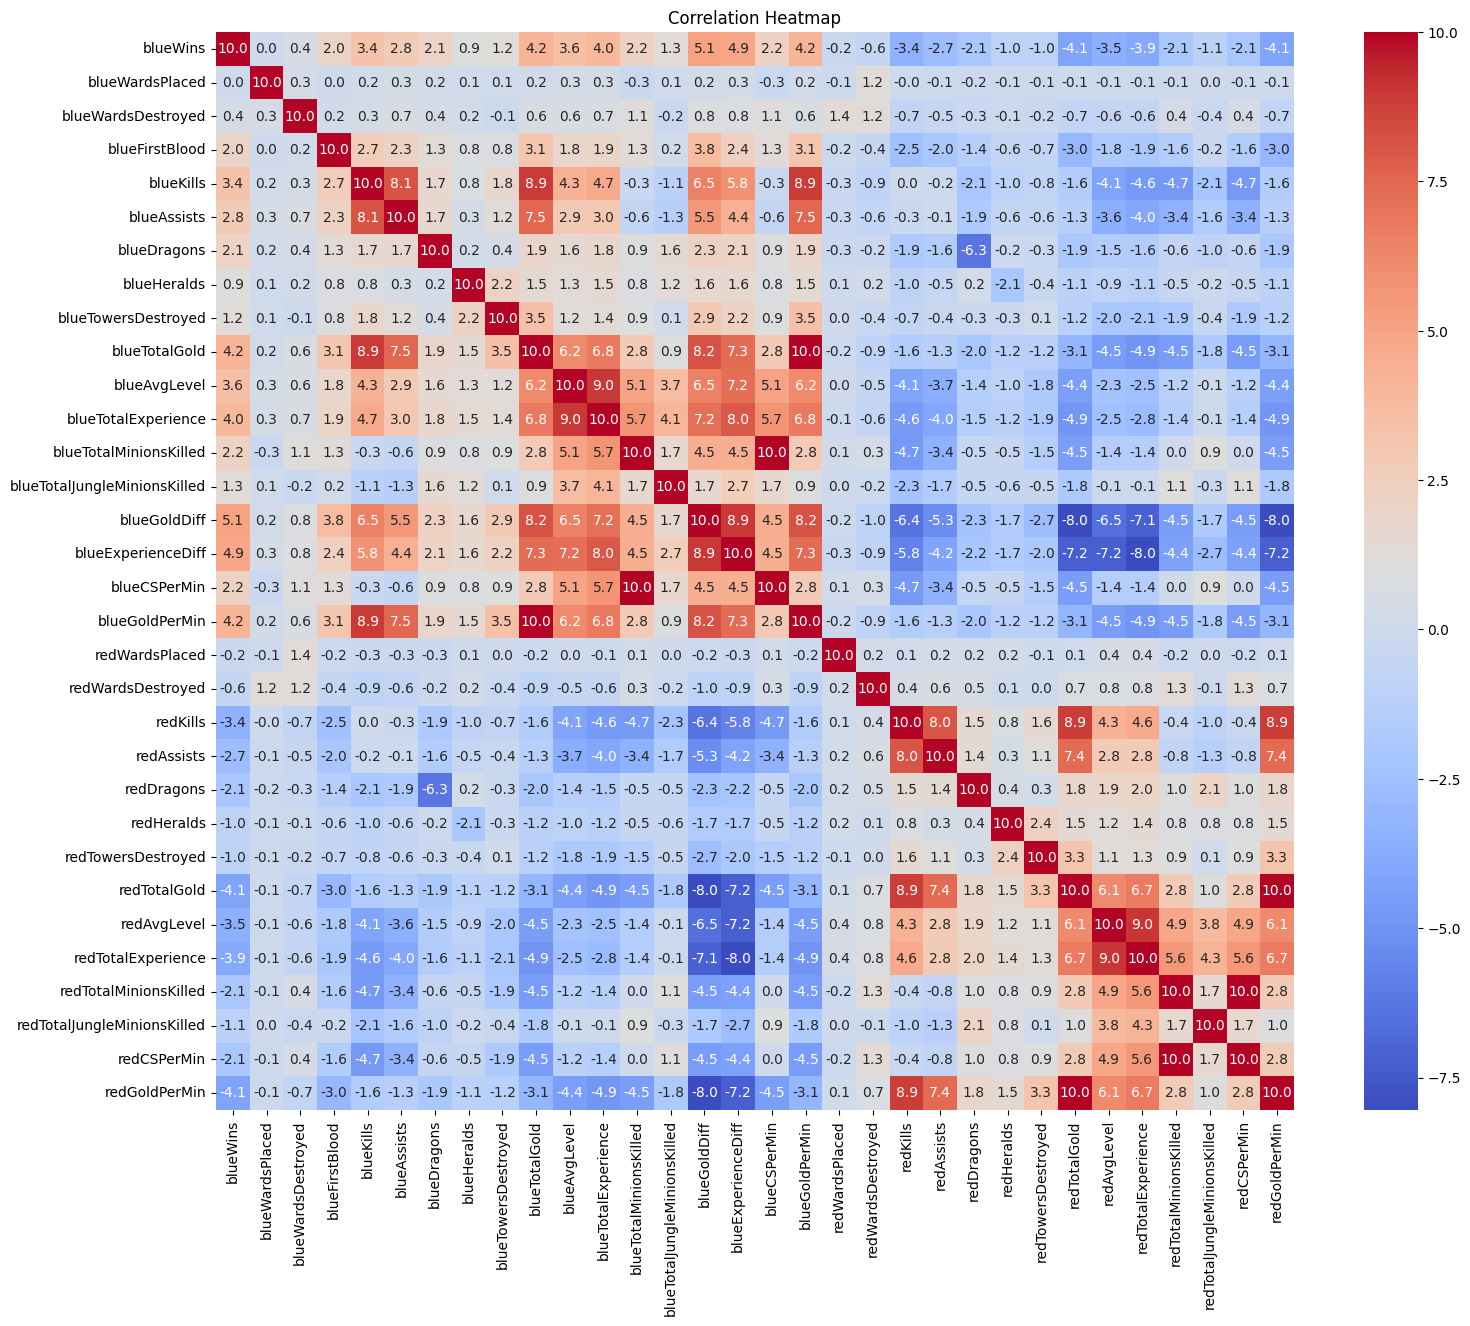

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(18, 14))
# multiply by 10 to make the numbers easier to read
sns.heatmap(10 * df_corr, annot=True, cmap='coolwarm', square=True, annot_kws={'size': 10}, fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()

In [11]:
df_corr["blueWins"].sort_values(ascending=False).drop("blueWins")

blueGoldDiff                    0.511119
blueExperienceDiff              0.489558
blueTotalGold                   0.417213
blueGoldPerMin                  0.417213
blueTotalExperience             0.396141
blueAvgLevel                    0.357820
blueKills                       0.337358
blueAssists                     0.276685
blueCSPerMin                    0.224909
blueTotalMinionsKilled          0.224909
blueDragons                     0.213768
blueFirstBlood                  0.201769
blueTotalJungleMinionsKilled    0.131445
blueTowersDestroyed             0.115566
blueHeralds                     0.092385
blueWardsDestroyed              0.044247
blueWardsPlaced                 0.000087
redWardsPlaced                 -0.023671
redWardsDestroyed              -0.055400
redHeralds                     -0.097172
redTowersDestroyed             -0.103696
redTotalJungleMinionsKilled    -0.110994
redDragons                     -0.209516
redCSPerMin                    -0.212171
redTotalMinionsK

### K-Means Clustering

2 clusters: 85139981179.01396
3 clusters: 60426476780.48638
4 clusters: 49809021983.13976
5 clusters: 44365656312.765396
6 clusters: 40173460422.53479
7 clusters: 37248958701.24556
8 clusters: 34511857697.5789
9 clusters: 32788081538.372414
10 clusters: 31083015369.674923
11 clusters: 29899504975.464558
12 clusters: 28978397412.13007
13 clusters: 27686767733.163483
14 clusters: 26985311366.270065
15 clusters: 26216614400.94468
16 clusters: 25296556164.411915
17 clusters: 24719039853.303852
18 clusters: 24043760443.80737
19 clusters: 23462474622.41425


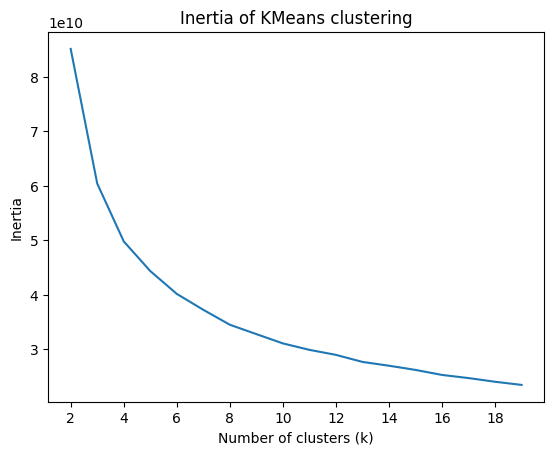

In [12]:
# clustering to explore if games fall into distinct groups
from sklearn.cluster import KMeans

# search for elbow point

inertia = []

# We want to analyze games only using features we would have available at the 10 minute mark
# Obviously we also want to drop our target variable
X = df.drop(columns=["blueWins"])

for n_clusters in range(2, 20):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    print(f"{n_clusters} clusters: {kmeans.inertia_}")
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 20), inertia)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia of KMeans clustering')
plt.xticks(np.arange(2, 20, 2.0))
plt.show()

It seems like the elbow occurs at $k=5$ clusters.

In [13]:
kmeans = KMeans(n_clusters=5, random_state=42).fit(X)
df["Cluster"] = kmeans.labels_

# check if clusters are balanced
df["Cluster"].value_counts()

Cluster
1    3081
2    2709
0    2213
3    1107
4     769
Name: count, dtype: int64

In [14]:
# see what features are most important for each cluster
cluster_means = df.groupby("Cluster").mean()
cluster_means

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,...,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.785811,22.326254,3.046543,0.683235,7.907817,8.584727,0.463172,0.239042,0.063263,17559.015816,...,0.290556,0.102576,0.006326,15419.895617,6.749119,17181.982829,209.529146,49.432445,20.952915,1541.989562
1,0.530347,22.704966,2.925673,0.517689,6.067186,6.580331,0.383966,0.202856,0.030185,16511.623499,...,0.406362,0.143460,0.015904,16244.255112,6.916001,17903.179163,217.846154,51.203181,21.784615,1624.425511
2,0.271687,22.021041,2.655592,0.371355,4.653747,4.926910,0.276486,0.141381,0.011443,15582.122924,...,0.501292,0.194906,0.047250,17213.444814,7.066150,18588.975268,224.717608,52.908453,22.471761,1721.344481
3,0.093948,21.315266,2.483288,0.237579,3.658537,3.846432,0.165312,0.068654,0.001807,14719.681120,...,0.601626,0.297200,0.209575,18833.285456,7.266667,19444.200542,230.741644,54.465221,23.074164,1883.328546
4,0.932380,22.851756,2.871261,0.794538,10.716515,11.404421,0.566970,0.317295,0.314694,19246.508453,...,0.210663,0.071521,0.002601,14620.015605,6.482185,16096.551365,192.626788,47.007802,19.262679,1462.001560


### Analysis of Clusters

Just looking at win rate, it seems that the clusters roughly describe:
* games where the blue team is favored, but there's still a 22% chance the red team wins
* games where both teams start out relatively close (but skews slightly blue)
* games where the red team is favored, but there's still a 27% chance the blue team wins
* games where the blue team gets a terrible start and has a >90% chance to lose
* games where the red team gets a terrible start and has a >93% chance to lose

Interestingly, the blue team won only 49.9% of their games across the entire data set, but seem to have a 53.0% chance to win in the "close" games 

In [15]:
# reindex by blueWins
cluster_means = cluster_means.reindex(cluster_means["blueWins"].sort_values().index)

# Label clusters
cluster_names = ["Blue Stomp", "Blue Favored", "Roughly Even", "Red Favored", "Red Stomp"]

# print statistics for each cluster
for i, cluster_name in enumerate(cluster_names):
    print(cluster_name)
    print(f"Number of games: {len(df[df['Cluster'] == i])}")
    print(f"Win rate: {len(df[(df['Cluster'] == i) & (df['blueWins'] == 1)])/len(df[df['Cluster'] == i])}")
    print(cluster_means.loc[i].sort_values(ascending=False))
    print()

Blue Stomp
Number of games: 2213
Win rate: 0.7858111161319475
blueTotalExperience             18783.418437
blueTotalGold                   17559.015816
redTotalExperience              17181.982829
redTotalGold                    15419.895617
blueGoldDiff                     2139.120199
blueGoldPerMin                   1755.901582
blueExperienceDiff               1601.435608
redGoldPerMin                    1541.989562
blueTotalMinionsKilled            225.891550
redTotalMinionsKilled             209.529146
blueTotalJungleMinionsKilled       52.472210
redTotalJungleMinionsKilled        49.432445
blueCSPerMin                       22.589155
blueWardsPlaced                    22.326254
redWardsPlaced                     22.022594
redCSPerMin                        20.952915
blueAssists                         8.584727
blueKills                           7.907817
blueAvgLevel                        7.108721
redAvgLevel                         6.749119
redAssists                          4.

In [16]:
# correlation between each feature and cluster
cluster_means.reset_index().corr().sort_values("Cluster", ascending=False)["Cluster"].drop("Cluster")

blueTowersDestroyed             0.573019
redTowersDestroyed              0.336707
blueKills                       0.181137
redAssists                      0.173445
redKills                        0.167135
redHeralds                      0.163463
blueAssists                     0.152487
blueTotalGold                   0.142009
blueGoldPerMin                  0.142009
redTotalGold                    0.095574
redGoldPerMin                   0.095574
blueHeralds                     0.037283
redDragons                      0.035702
blueGoldDiff                    0.027897
blueExperienceDiff              0.021413
blueDragons                    -0.011153
blueTotalExperience            -0.035507
blueFirstBlood                 -0.040273
blueAvgLevel                   -0.045438
blueWins                       -0.065122
redTotalExperience             -0.077464
redTotalJungleMinionsKilled    -0.085972
blueWardsPlaced                -0.087425
redAvgLevel                    -0.096615
blueTotalMinions

Interestingly, the most correlated features indicate that how many towers each team destroyed were very highly correlated with which cluster each game was placed in, with a moderately weak correlation with kills. Experience and gold had a very small absolute correlation.

In [17]:
# try to determine most predictive features for each cluster
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

cluster_feature_importance = {}

for cluster in range(5):
    cluster_data = df[df["Cluster"] == cluster]

    y = cluster_data['blueWins']
    X = cluster_data.drop(columns=['blueWins', 'Cluster'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train_scaler = preprocessing.StandardScaler().fit(X_train)

    X_train_scaled = X_train_scaler.transform(X_train)

    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train_scaled, y_train)

    feature_importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
    cluster_feature_importance[cluster] = feature_importance


# print out the most important features for each cluster
for i, cluster_name in enumerate(cluster_names):
    print(f"Cluster {i} ({cluster_name}):")

    for j, (feature, importance) in enumerate(cluster_feature_importance[i].items()):
        print(f"{j+1}. {feature}: {importance:.3f} (value: {cluster_means.loc[i, feature]:.3f})")
        if j == 4:
            print()
            break

Cluster 0 (Blue Stomp):
1. blueGoldDiff: 0.063 (value: 2139.120)
2. blueExperienceDiff: 0.052 (value: 1601.436)
3. redTotalGold: 0.051 (value: 15419.896)
4. blueTotalExperience: 0.051 (value: 18783.418)
5. blueGoldPerMin: 0.049 (value: 1755.902)

Cluster 1 (Blue Favored):
1. blueGoldDiff: 0.064 (value: 267.368)
2. blueExperienceDiff: 0.060 (value: 152.145)
3. blueTotalExperience: 0.055 (value: 18055.324)
4. redTotalExperience: 0.053 (value: 17903.179)
5. blueGoldPerMin: 0.049 (value: 1651.162)

Cluster 2 (Roughly Even):
1. blueGoldDiff: 0.064 (value: -1631.322)
2. blueExperienceDiff: 0.053 (value: -1283.343)
3. redTotalExperience: 0.051 (value: 18588.975)
4. blueTotalExperience: 0.051 (value: 17305.633)
5. blueGoldPerMin: 0.050 (value: 1558.212)

Cluster 3 (Red Favored):
1. blueGoldDiff: 0.061 (value: -4113.604)
2. blueGoldPerMin: 0.060 (value: 1471.968)
3. blueExperienceDiff: 0.055 (value: -3170.960)
4. blueTotalGold: 0.053 (value: 14719.681)
5. blueTotalExperience: 0.052 (value: 1627

The random forest classifier indicates that every cluster was strongly predicted by the gold difference and experience difference, which is the opposite of what the cluster correlation indicated. This is explained by the cluster correlation being a proxy for winrate, so we would expect gold and experience to matter in every single game, hence have a low correlation. This indicates that the most predictive feature not of a win, but of a stomp, is how many towers the team destroyed.

In [18]:
notebook_end_time = datetime.datetime.now()
print(f"Notebook last run (end-to-end): {notebook_end_time} (duration: {notebook_end_time - notebook_start_time})")

Notebook last run (end-to-end): 2025-02-04 21:36:25.473941 (duration: 0:00:06.630987)
